# Ficheiro para tratamento de dados

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns


#%pip install tabulate


In [271]:

# Replace 'file_path.csv' with the path to your CSV file
file_path = '../measurements_final/measurements_haskell.csv' 

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


  Language            Program  PowerLimit     Package        Core GPU DRAM  \
0  Haskell   spectral/sorting          -1  133.205444  125.553711            
1  Haskell   spectral/sorting          -1  131.752808  124.248169            
2  Haskell   spectral/sorting          -1  131.120361  123.657898            
3  Haskell   spectral/sorting          -1  133.041931  125.477661            
4  Haskell   spectral/sorting          -1  129.811523  122.314453            

   Time  Temperature  Memory  
0  4999         37.7    7424  
1  4926         38.3    7552  
2  4903         41.7    7424  
3  4962         43.8    7424  
4  4920         39.8    7424  


In [244]:
unique_programs = df['Program'].unique()
print(unique_programs)

[' app_objects' ' app_fib' ' app_mandelbrot' ' app_sieve' ' app_strconcat'
 ' app_tak' ' app_tarai' ' app_whileloop']


In [245]:
df.shape 

(1040, 10)

In [246]:
df.describe()

,PowerLimit,Package,Core,Time,Temperature,Memory
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,6.846154,0.067688,0.051583,5.477885,35.986827,1023.507692
std,5.561398,0.019683,0.024367,2.518744,2.089294,7.926754
min,-1.000000,0.038452,0.020447,2.000000,33.700000,896.000000
25%,3.000000,0.050522,0.033386,4.000000,34.500000,1024.000000
50%,6.000000,0.067596,0.046600,5.000000,35.300000,1024.000000
75%,9.000000,0.080154,0.063873,7.000000,36.500000,1024.000000
max,20.000000,0.143860,0.132812,13.000000,44.200000,1024.000000


In [247]:
df = df.drop(columns=['GPU', 'DRAM', 'Language'])

df.shape

(1040, 7)

In [248]:
def remove_outliers(group):
    # Sort group by 'Package' and remove the 2 smallest and 2 largest outliers
    group = group.sort_values(by='Package')
    group = group.iloc[1:-2]  # Remove top 2 and bottom 2 for 'Package'

    # Sort the remaining group by 'Core' and remove the 2 smallest and 2 largest outliers
    group = group.sort_values(by='Core')
    group = group.iloc[1:-2]  # Remove top 2 and bottom 2 for 'Core'

    return group
    
# Group by 'Program' and 'PowerLimit' and apply the function to remove outliers
df = df.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)

# Display the cleaned DataFrame
print(df)


            Program  PowerLimit   Package      Core  Time  Temperature  Memory
0           app_fib          -1  0.100403  0.107422     2         36.3    1024
1           app_fib          -1  0.101318  0.108582     2         36.3    1024
2           app_fib          -1  0.109436  0.113892     2         36.3    1024
3           app_fib          -1  0.100952  0.115540     2         36.3    1024
4           app_fib           1  0.045105  0.023438    10         35.3    1024
..              ...         ...       ...       ...   ...          ...     ...
411   app_whileloop          15  0.082642  0.070679     3         40.2    1024
412   app_whileloop          20  0.095337  0.075256     3         42.0    1024
413   app_whileloop          20  0.078186  0.075439     3         42.0    1024
414   app_whileloop          20  0.094360  0.079041     3         42.0    1024
415   app_whileloop          20  0.081665  0.081055     3         36.8    1024

[416 rows x 7 columns]


/tmp/ipykernel_7829/2049201771.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Program', 'PowerLimit']).apply(remove_outliers).reset_index(drop=True)


In [249]:
df.shape

(416, 7)

In [250]:
df_mean = df.groupby(['Program', 'PowerLimit']).mean().reset_index()

df_mean.shape

(104, 7)

In [251]:
df_mean.head()

,Program,PowerLimit,Package,Core,Time,Temperature,Memory
0,app_fib,-1,0.103027,0.111359,2.00,36.300,1024.0
1,app_fib,1,0.044434,0.023727,10.00,35.300,1024.0
2,app_fib,2,0.043640,0.024231,10.00,34.400,1024.0
3,app_fib,3,0.046478,0.030853,7.25,33.900,1024.0
4,app_fib,4,0.054214,0.035187,6.75,34.075,1024.0


In [252]:
df_mean['Time'] = df_mean['Time'] / 1000 
df['Time'] = df['Time'] / 1000

In [253]:
df_mean.shape

(104, 7)

In [254]:
200.702/250.803 *100

80.02376367108846

In [255]:
df_mean = df_mean.drop(columns = ['Program']).groupby(['PowerLimit']).mean().reset_index()

df_mean

,PowerLimit,Package,Core,Time,Temperature,Memory
0,-1,0.106665,0.109045,0.002063,38.281250,1024.0
1,1,0.044327,0.023829,0.010031,35.187500,1020.0
2,2,0.044434,0.024115,0.010094,34.353125,1024.0
3,3,0.049685,0.031307,0.007281,34.153125,1024.0
4,4,0.053616,0.034613,0.006281,34.287500,1024.0
5,5,0.051353,0.034384,0.005344,34.600000,1024.0
6,6,0.059101,0.038700,0.005063,35.068750,1024.0
7,7,0.064705,0.045179,0.004812,35.175000,1016.0
8,8,0.070312,0.052174,0.004375,35.840625,1024.0
9,9,0.074190,0.054995,0.004094,35.875000,1024.0


In [256]:

print(tabulate(df_mean, headers='keys', tablefmt='psql'))

+----+--------------+-----------+-----------+------------+---------------+----------+
|    |   PowerLimit |   Package |      Core |       Time |   Temperature |   Memory |
|----+--------------+-----------+-----------+------------+---------------+----------|
|  0 |           -1 | 0.106665  | 0.109045  | 0.0020625  |       38.2812 |     1024 |
|  1 |            1 | 0.0443268 | 0.0238285 | 0.0100313  |       35.1875 |     1020 |
|  2 |            2 | 0.0444336 | 0.0241146 | 0.0100938  |       34.3531 |     1024 |
|  3 |            3 | 0.0496845 | 0.0313072 | 0.00728125 |       34.1531 |     1024 |
|  4 |            4 | 0.0536156 | 0.0346127 | 0.00628125 |       34.2875 |     1024 |
|  5 |            5 | 0.0513535 | 0.0343838 | 0.00534375 |       34.6    |     1024 |
|  6 |            6 | 0.0591011 | 0.0387001 | 0.0050625  |       35.0688 |     1024 |
|  7 |            7 | 0.0647049 | 0.0451794 | 0.0048125  |       35.175  |     1016 |
|  8 |            8 | 0.0703125 | 0.0521736 | 0.004375

In [257]:
d1 = df_mean
d1['Ganho Package (%)'] = d1['Package'].pct_change() * 100
d1['Ganho Temporal'] = d1['Time'].pct_change() 
d1 = d1[['PowerLimit', 'Package', 'Ganho Package (%)', 'Time','Ganho Temporal']]
d1

,PowerLimit,Package,Ganho Package (%),Time,Ganho Temporal
0,-1,0.106665,NaN,0.002063,NaN
1,1,0.044327,-58.442859,0.010031,3.863636
2,2,0.044434,0.240964,0.010094,0.006231
3,3,0.049685,11.817479,0.007281,-0.278638
4,4,0.053616,7.912012,0.006281,-0.137339
5,5,0.051353,-4.219139,0.005344,-0.149254
6,6,0.059101,15.086911,0.005063,-0.052632
7,7,0.064705,9.481701,0.004812,-0.049383
8,8,0.070312,8.666431,0.004375,-0.090909
9,9,0.074190,5.514865,0.004094,-0.064286


In [258]:
d1 = df_mean.copy()
d1['Dif Package (%)'] = (d1['Package']/d1['Package'].iloc[0]) * 100
d1['Dif Temporal'] = (d1['Time']/d1['Time'].iloc[0])
d1 = d1[['PowerLimit', 'Package', 'Dif Package (%)', 'Time','Dif Temporal']]
d1

,PowerLimit,Package,Dif Package (%),Time,Dif Temporal
0,-1,0.106665,100.000000,0.002063,1.000000
1,1,0.044327,41.557141,0.010031,4.863636
2,2,0.044434,41.657279,0.010094,4.893939
3,3,0.049685,46.580119,0.007281,3.530303
4,4,0.053616,50.265544,0.006281,3.045455
5,5,0.051353,48.144770,0.005344,2.590909
6,6,0.059101,55.408329,0.005063,2.454545
7,7,0.064705,60.661982,0.004812,2.333333
8,8,0.070312,65.919210,0.004375,2.121212
9,9,0.074190,69.554566,0.004094,1.984848


In [259]:
df_mean = df_mean.drop(columns=['Ganho Package (%)','Ganho Temporal'])

In [260]:
df

,Program,PowerLimit,Package,Core,Time,Temperature,Memory
0,app_fib,-1,0.100403,0.107422,0.002,36.3,1024
1,app_fib,-1,0.101318,0.108582,0.002,36.3,1024
2,app_fib,-1,0.109436,0.113892,0.002,36.3,1024
3,app_fib,-1,0.100952,0.115540,0.002,36.3,1024
4,app_fib,1,0.045105,0.023438,0.010,35.3,1024
...,...,...,...,...,...,...,...
411,app_whileloop,15,0.082642,0.070679,0.003,40.2,1024
412,app_whileloop,20,0.095337,0.075256,0.003,42.0,1024
413,app_whileloop,20,0.078186,0.075439,0.003,42.0,1024
414,app_whileloop,20,0.094360,0.079041,0.003,42.0,1024


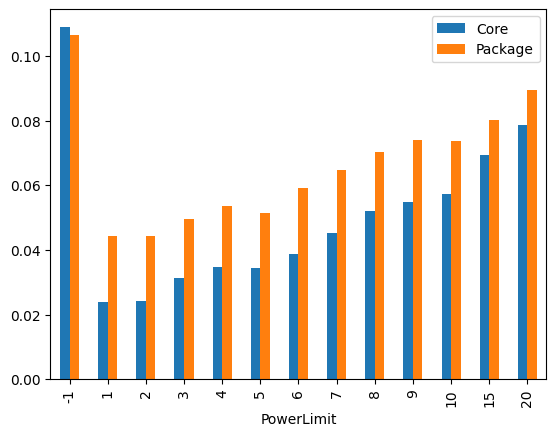

In [261]:
# Calculate the mean for each 'PowerLimit'
# Create a bar graph for each 'PowerLimit'
df_mean.plot(x='PowerLimit', y=['Core', 'Package'], kind='bar')
plt.savefig('core_package_python.png', dpi=300, bbox_inches='tight')
plt.show()

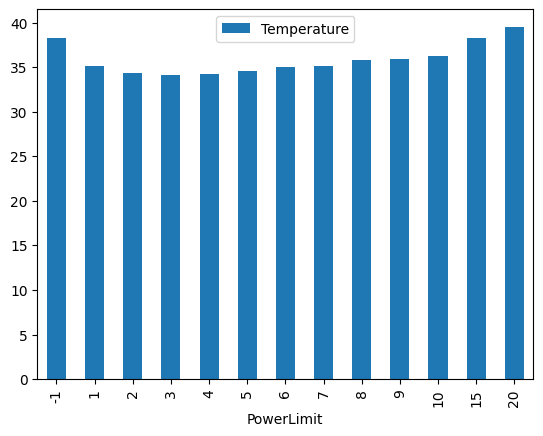

In [262]:
df_mean.plot(x='PowerLimit', y='Temperature', kind='bar')
plt.savefig('temperature_python.png', dpi=300, bbox_inches='tight')
plt.show()

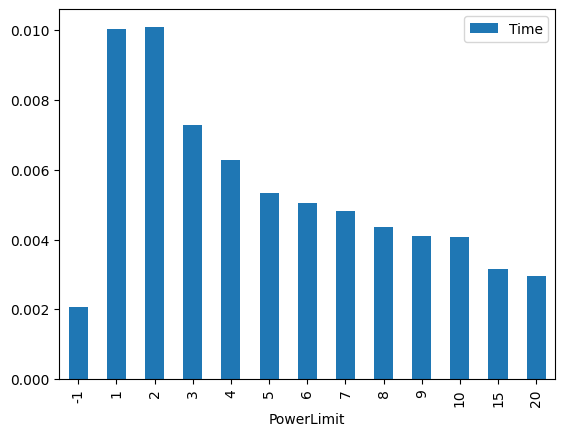

In [263]:

# Create a bar graph for each 'PowerLimit'
df_mean.plot(x='PowerLimit', y=['Time'], kind='bar')
plt.savefig('dist_time_python.png', dpi=300, bbox_inches='tight')
plt.show()

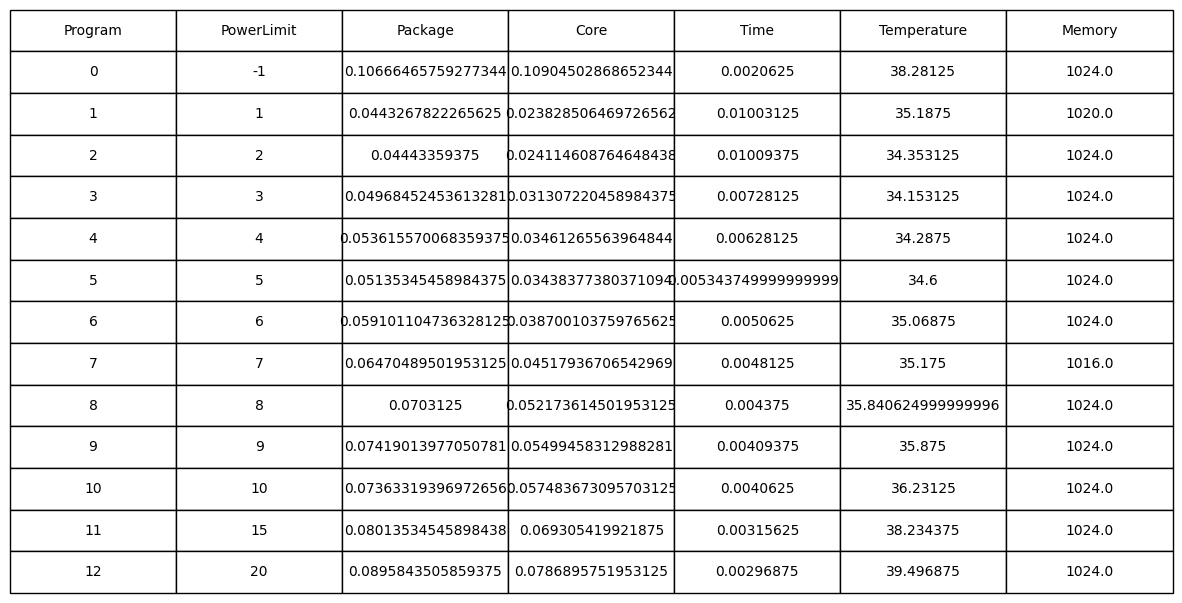

In [264]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

table_data = []
for row in df_mean.itertuples():
    table_data.append(row[0:])

table = ax.table(cellText=table_data, colLabels=df.columns, cellLoc = 'center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

ax.axis('off')

plt.show()

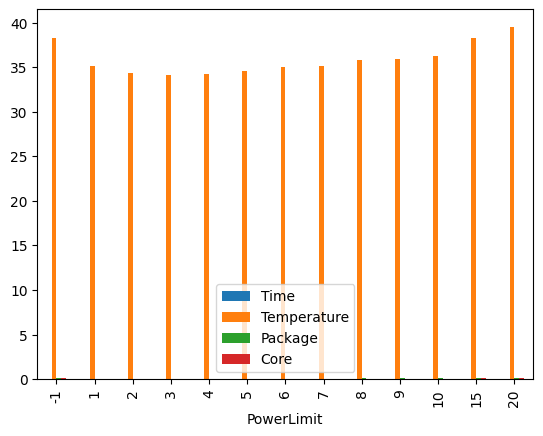

In [265]:
df_mean.plot(x='PowerLimit', y=['Time', 'Temperature', 'Package',  'Core'], kind='bar')
plt.savefig('values_powerlimit_python.png', dpi=300, bbox_inches='tight')
plt.show()

In [266]:
mean_df = df.groupby(['Program', 'PowerLimit']).mean().reset_index()
filtered_df = mean_df[(mean_df['PowerLimit'].isin([-1,1]))]
filtered_df['Time'] = filtered_df['Time']
filtered_df

/tmp/ipykernel_7829/1952997710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Time'] = filtered_df['Time']


,Program,PowerLimit,Package,Core,Time,Temperature,Memory
0,app_fib,-1,0.103027,0.111359,0.00200,36.300,1024.0
1,app_fib,1,0.044434,0.023727,0.01000,35.300,1024.0
13,app_mandelbrot,-1,0.099243,0.108765,0.00225,42.425,1024.0
14,app_mandelbrot,1,0.044800,0.023315,0.01000,35.550,1024.0
26,app_objects,-1,0.105209,0.107666,0.00200,36.600,1024.0
27,app_objects,1,0.043137,0.022720,0.01000,35.650,1024.0
39,app_sieve,-1,0.107300,0.110504,0.00200,36.800,1024.0
40,app_sieve,1,0.043961,0.023880,0.01000,35.200,1024.0
52,app_strconcat,-1,0.107391,0.106323,0.00200,36.700,1024.0
53,app_strconcat,1,0.044662,0.024643,0.01000,34.850,1024.0


/tmp/ipykernel_7829/1444558792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Program'] = filtered_df['Program'].str.strip().str.lower()


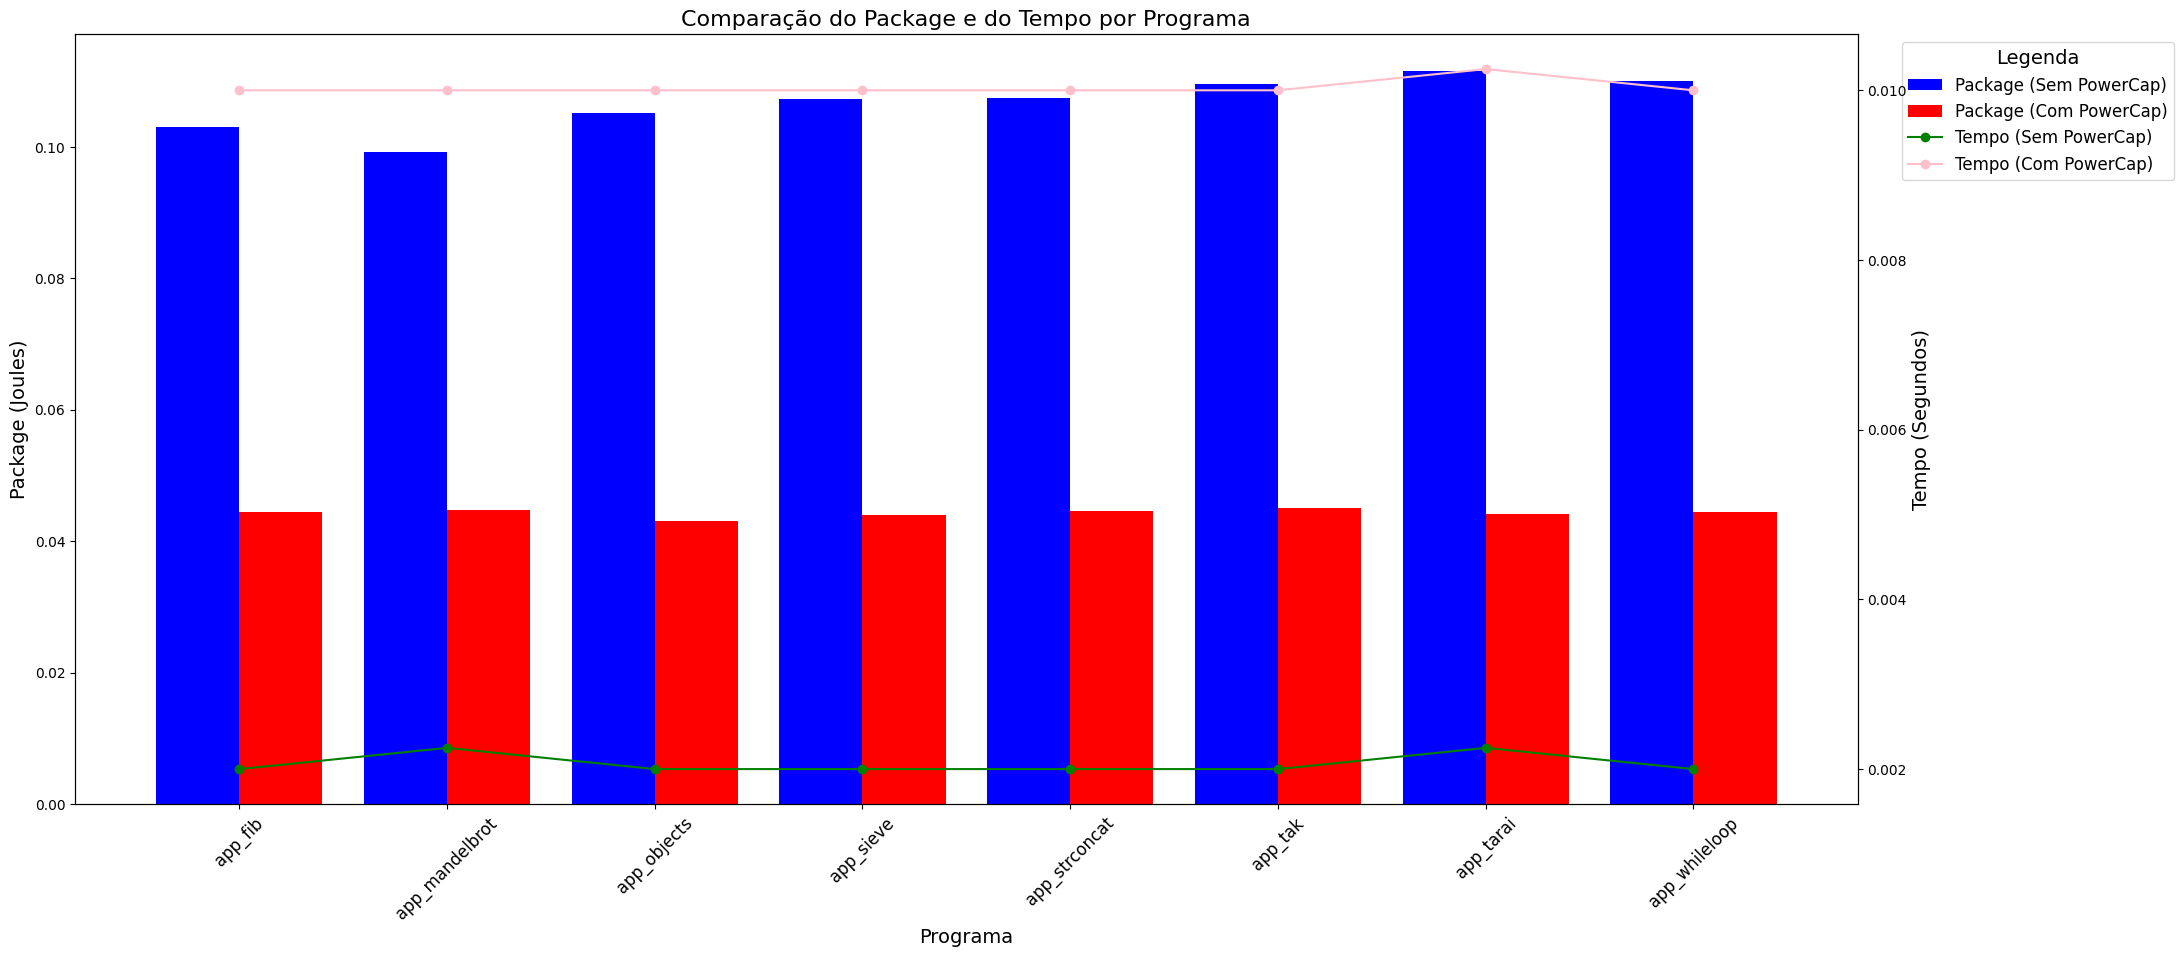

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean the 'Program' column to ensure consistent formatting
filtered_df['Program'] = filtered_df['Program'].str.strip().str.lower()

# Filter the DataFrame to exclude "docutils"
filtered_df_no_docutils = filtered_df[~filtered_df['Program'].isin(['docutils'])]

# Create the figure and axis
fig1, ax1 = plt.subplots(figsize=(23, 10))

# Calculate mean values for 'Package' excluding "docutils"
mean_package_no_docutils = (
    filtered_df_no_docutils[filtered_df_no_docutils['PowerLimit'].isin([-1, 1])]
    .groupby(['Program', 'PowerLimit'])['Package']
    .mean()
    .unstack()
)
mean_time_no_docutils = (
    filtered_df_no_docutils[filtered_df_no_docutils['PowerLimit'].isin([-1, 1])]
    .groupby(['Program', 'PowerLimit'])['Time']
    .mean()
    .unstack()
)

# Define positions for bars
bar_positions = np.arange(len(mean_package_no_docutils.index))  # Programs
bar_width = 0.4  # Bar width

# Plot 'Package' as bars
bars_no_powercap = ax1.bar(
    bar_positions - bar_width / 2,  # Shifted to the left for -1
    mean_package_no_docutils[-1],
    width=bar_width,
    color='blue',
    label='Package (Sem PowerCap)'
)

bars_powercap = ax1.bar(
    bar_positions + bar_width / 2,  # Shifted to the right for 4
    mean_package_no_docutils[1],
    width=bar_width,
    color='red',
    label='Package (Com PowerCap)'
)

# Create a secondary axis for 'Time'
ax2_1 = ax1.twinx()

# Plot 'Time' as lines
line_no_powercap, = ax2_1.plot(
    bar_positions,
    mean_time_no_docutils[-1],
    color='green',
    label='Time (Sem PowerCap)',
    marker='o'
)

line_powercap, = ax2_1.plot(
    bar_positions,
    mean_time_no_docutils[1],
    color='pink',
    label='Time (Com PowerCap)',
    marker='o'
)

# Customize titles and labels
ax1.set_title('Comparação do Package e do Tempo por Programa', fontsize=16)
ax1.set_xlabel('Programa', fontsize=14)
ax1.set_ylabel('Package (Joules)', fontsize=14)
ax2_1.set_ylabel('Tempo (Segundos)', fontsize=14)

# Set x-ticks to match program names
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(mean_package_no_docutils.index, fontsize=12, rotation=45)

# Melhorar a legenda combinada
bars_handles, bars_labels = ax1.get_legend_handles_labels()
lines_handles = [line_no_powercap, line_powercap]
lines_labels = ['Tempo (Sem PowerCap)', 'Tempo (Com PowerCap)']

# Combinar handles e labels
all_handles = bars_handles + lines_handles
all_labels = bars_labels + lines_labels

# Ajustar a posição e o estilo da legenda
ax1.legend(all_handles, all_labels, loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=12, title="Legenda", title_fontsize=14)

# Salvar o gráfico
plt.savefig('comparacao_programs_ruby.png', dpi=300, bbox_inches='tight')

# Mostrar o gráfico
plt.show()




/tmp/ipykernel_7829/840567593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Program'] = filtered_df['Program'].str.strip().str.lower()


KeyError: -1

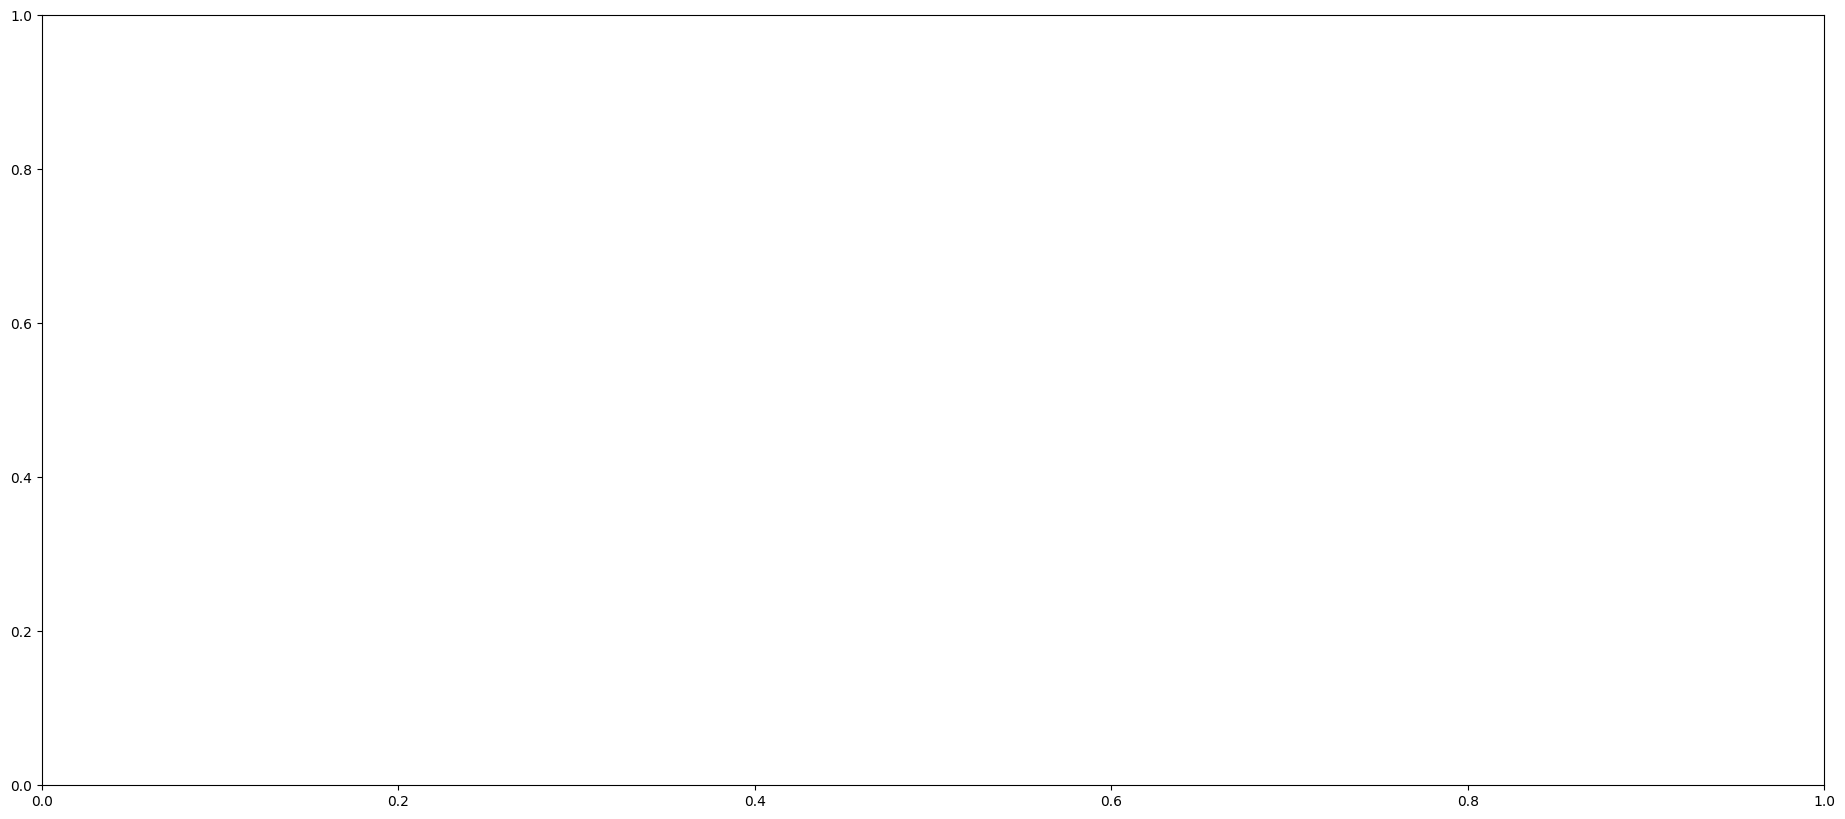

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean the 'Program' column to ensure consistent formatting
filtered_df['Program'] = filtered_df['Program'].str.strip().str.lower()

# Filter the DataFrame to exclude "docutils"
filtered_df_no_docutils = filtered_df[filtered_df['Program'].isin(['docutils'])]

# Create the figure and axis
fig1, ax1 = plt.subplots(figsize=(23, 10))

# Calculate mean values for 'Package' excluding "docutils"
mean_package_no_docutils = (
    filtered_df_no_docutils[filtered_df_no_docutils['PowerLimit'].isin([-1, 4])]
    .groupby(['Program', 'PowerLimit'])['Package']
    .mean()
    .unstack()
)
mean_time_no_docutils = (
    filtered_df_no_docutils[filtered_df_no_docutils['PowerLimit'].isin([-1, 4])]
    .groupby(['Program', 'PowerLimit'])['Time']
    .mean()
    .unstack()
)

# Define positions for bars
bar_positions = np.arange(len(mean_package_no_docutils.index))  # Programs
bar_width = 0.4  # Bar width

# Plot 'Package' as bars
bars_no_powercap = ax1.bar(
    bar_positions - bar_width / 2,  # Shifted to the left for -1
    mean_package_no_docutils[-1],
    width=bar_width,
    color='blue',
    label='Package (No PowerCap)'
)

bars_powercap = ax1.bar(
    bar_positions + bar_width / 2,  # Shifted to the right for 4
    mean_package_no_docutils[4],
    width=bar_width,
    color='red',
    label='Package (With PowerCap)'
)

# Create a secondary axis for 'Time'
ax2_1 = ax1.twinx()

# Plot 'Time' as lines
line_no_powercap, = ax2_1.plot(
    bar_positions,
    mean_time_no_docutils[-1],
    color='green',
    label='Time (No PowerCap)',
    marker='o'
)

line_powercap, = ax2_1.plot(
    bar_positions,
    mean_time_no_docutils[4],
    color='pink',
    label='Time (With PowerCap)',
    marker='o'
)

# Customize titles and labels
ax1.set_title('Comparação do Package e do Tempo por Programa', fontsize=16)
ax1.set_xlabel('Programa', fontsize=14)
ax1.set_ylabel('Package (Joules)', fontsize=14)
ax2_1.set_ylabel('Time (Segundos)', fontsize=14)

# Set x-ticks to match program names
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(mean_package_no_docutils.index, fontsize=12, rotation=45)

# Melhorar a legenda combinada
bars_handles, bars_labels = ax1.get_legend_handles_labels()
lines_handles = [line_no_powercap, line_powercap]
lines_labels = ['Time (No PowerCap)', 'Time (With PowerCap)']

# Combinar handles e labels
all_handles = bars_handles + lines_handles
all_labels = bars_labels + lines_labels

# Ajustar a posição e o estilo da legenda
ax1.legend(all_handles, all_labels, loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=12, title="Legenda", title_fontsize=14)

# Salvar o gráfico
plt.savefig('comparacao_programs_python_including.png', dpi=300, bbox_inches='tight')

# Mostrar o gráfico
plt.show()




In [93]:
(218.6/92.9)*100



235.3067814854682

In [94]:
37/7.6


4.868421052631579

In [51]:
df.shape


(780, 7)

In [52]:
df_mean.shape

(13, 6)

In [53]:
df = df.reset_index()

df.sample(50)

,index,Program,PowerLimit,Package,Core,Time,Temperature,Memory
608,608,kafka,10,129.759644,103.046570,14.497,40.3,807432
724,724,tomcat,3,209.294983,148.063599,35.867,36.2,405288
70,70,avrora,15,164.531372,147.610840,11.004,45.3,119324
181,181,biojava,4,113.545776,68.038086,28.694,33.8,792612
770,770,tomcat,15,264.620728,231.932129,17.689,49.0,392652
344,344,graphchi,5,154.782043,104.851990,31.158,35.8,1078148
341,341,graphchi,4,162.955139,98.066284,41.044,34.7,1207468
167,167,biojava,1,132.720703,60.547058,46.243,34.0,756156
36,36,avrora,6,131.730103,98.170593,22.072,36.8,109868
418,418,jme,4,43.069641,26.255188,10.858,34.7,175140


In [54]:
# Calculate the mean for each 'Program' and 'PowerLimit'
#mean_df = df.groupby(['Program', 'PowerLimit']).mean().reset_index()

# Get unique 'Program' values
programs = mean_df['Program'].unique()

# Create a bar graph for each 'Program'
for program in programs:
    program_data = mean_df[mean_df['Program'] == program]
    program_data.plot(x='PowerLimit', y=['Time', 'Temperature', 'Package', 'Core'], kind='bar', title=program)
    plt.show()

NameError: name 'mean_df' is not defined